In [ ]:
!pip install nilearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 64.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### EDA

In [ ]:
pd.read_csv("participants.tsv", sep="\t")

,participant_id,gender,age,handedness,dx,iq_measure,verbal_iq,performance_iq,full4_iq,qc_rest_1,qc_anatomical_1
0,2371032,Female,10.73,Right,Typically Developing Children,1,121,119,122,Pass,Pass
1,2026113,Female,12.99,Right,ADHD-Combined,1,122,108,106,Pass,Pass
2,3434578,Female,8.12,Right,Typically Developing Children,1,85,98,89,Pass,Pass
3,8628223,Female,10.81,Right,Typically Developing Children,1,85,86,97,Pass,Pass
4,1623716,Female,12.65,Right,ADHD-Combined,1,89,88,89,Pass,Pass
...,...,...,...,...,...,...,...,...,...,...,...
78,2360428,Male,8.56,Right,Typically Developing Children,1,119,102,113,Pass,Pass
79,2903997,Female,11.91,Right,Typically Developing Children,1,121,121,126,Pass,Pass
80,2703289,Male,11.10,Right,Typically Developing Children,1,124,117,109,Pass,Pass
81,1577042,Male,9.06,Right,ADHD-Combined,1,100,90,90,Pass,Pass


In [ ]:
df = pd.read_csv("participants.tsv", sep="\t")

In [ ]:
df[df["iq_measure"] == 1].shape

(83, 11)

Видимо это переменная, которая показывает, прошёл ли человек тест на iq, но в нашем исследовании все его прошли, поэтому удалим этот признак

In [ ]:
df.drop(["iq_measure"], axis=1, inplace=True)

In [ ]:
numeric = ["age", "verbal_iq", "performance_iq", "full4_iq"]
categorical = ["gender", "handedness"]
target = "dx"

qc - quality control. Эксперты оценили, насколько качественно был сделан fMRI и дали каждому ряду/снимку пометку "Pass" или "Questionable". Не уверен, что эти признаки нужно использовать при обучении, поэтому не положил их в categorical

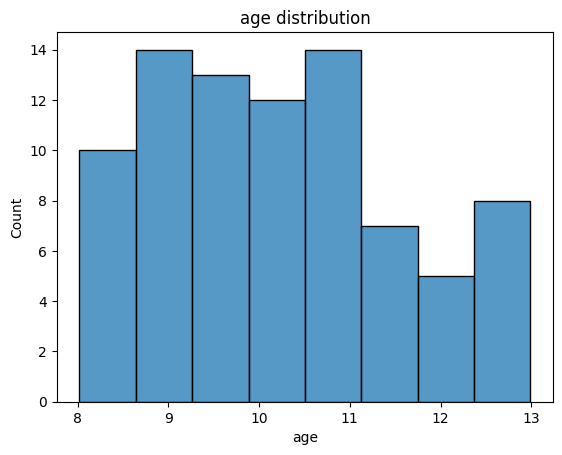

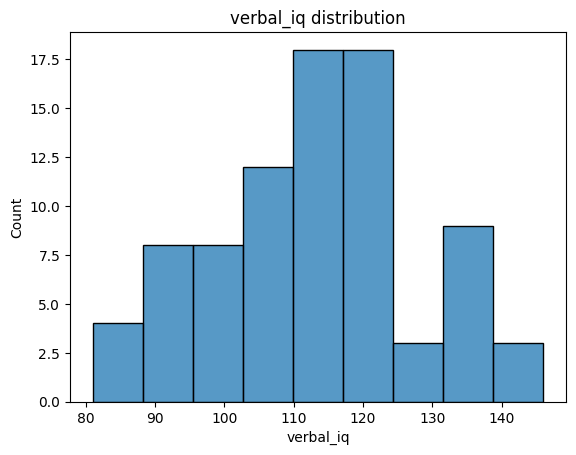

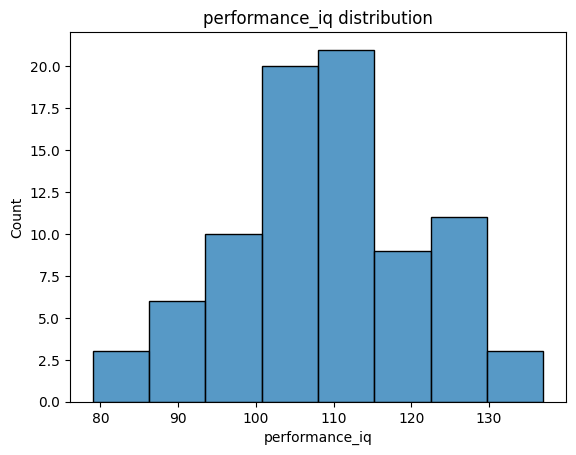

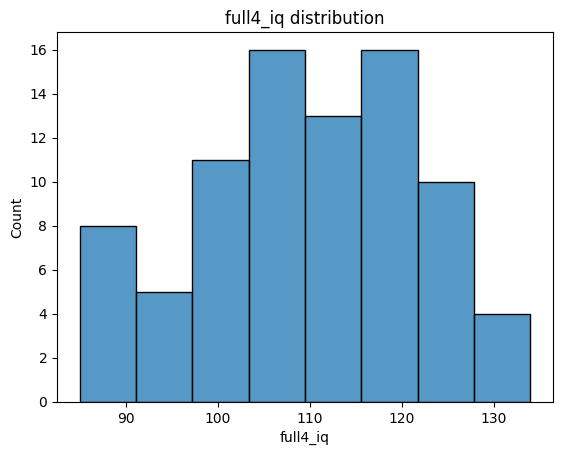

In [ ]:
for col in numeric:
    sns.histplot(data=df, x=col)
    plt.title(col + " distribution")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

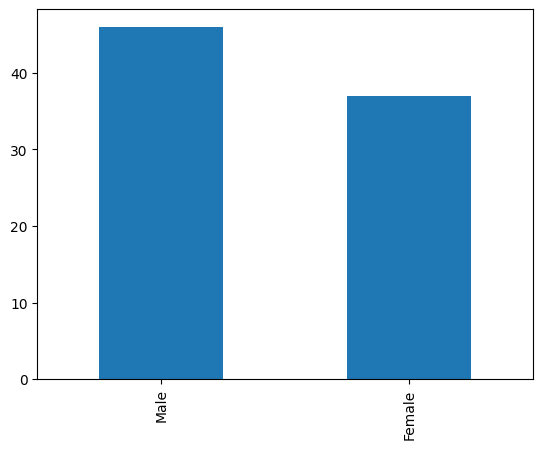

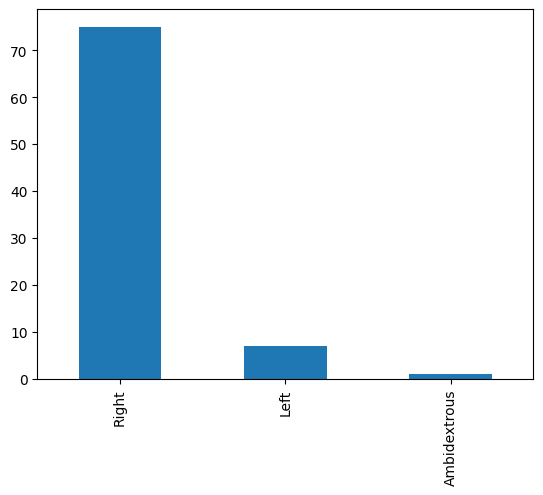

In [ ]:
for col in categorical:
    df[col].value_counts().plot(kind='bar')
    plt.show()

<Axes: >

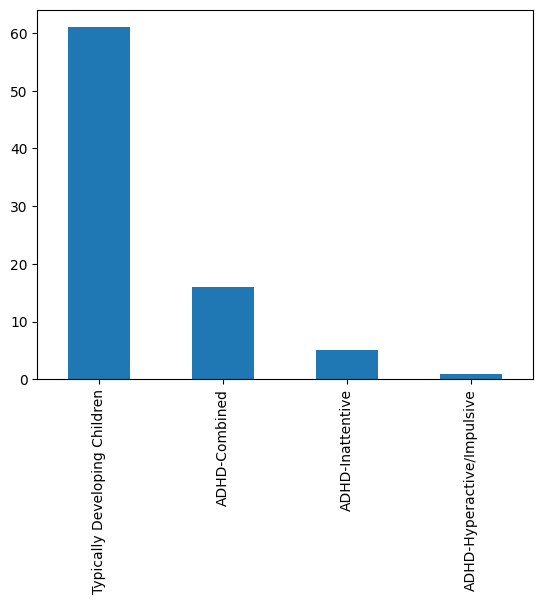

In [ ]:
df[target].value_counts().plot(kind='bar')

In [ ]:
filename4d = "sub-1018959_ses-1_task-rest_acq-1_run-1_bold.nii.gz"

In [ ]:
filename = "sub-1018959_ses-1_run-1_T1w.nii.gz"

In [ ]:
from nilearn import plotting
from nilearn import image

High res 3D scan

In [ ]:
image.load_img(filename).shape

(256, 200, 256)

Low res 4D scan

In [ ]:
image.load_img(filename4d).shape

(96, 96, 47, 152)

Slice along the time axis

In [ ]:
image.index_img(filename4d, 0).shape

(96, 96, 47)

In [ ]:
print(image.load_img(filename))

<class 'nibabel.nifti1.Nifti1Image'>
data shape (256, 200, 256)
affine: 
[[  -0.99999964   -0.           -0.          130.75500488]
 [  -0.            0.99999964   -0.         -122.02500153]
 [   0.            0.            0.99999762 -104.65799713]
 [   0.            0.            0.            1.        ]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 256 200 256   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [-1.          0.99999964  0.99999964  0.9999976   0.          0.
  0.          0.        ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal

3 рандомных среза по 3 осям:

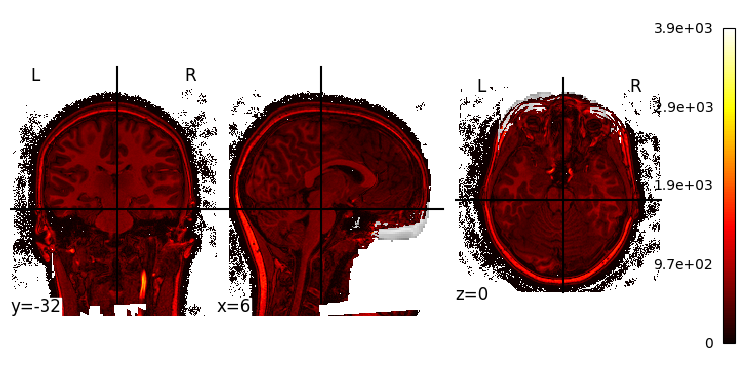

In [ ]:
plotting.plot_stat_map(filename)

Срезы по оси z снизу вверх как в статье

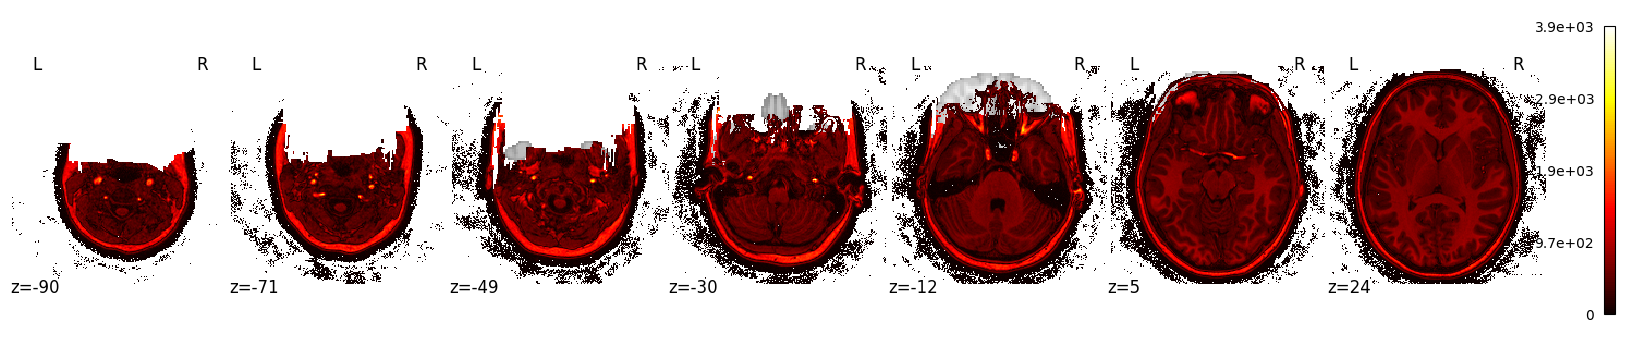

In [ ]:
plotting.plot_stat_map(filename, display_mode="z")

Добавляем threshold для лучшей читаемости

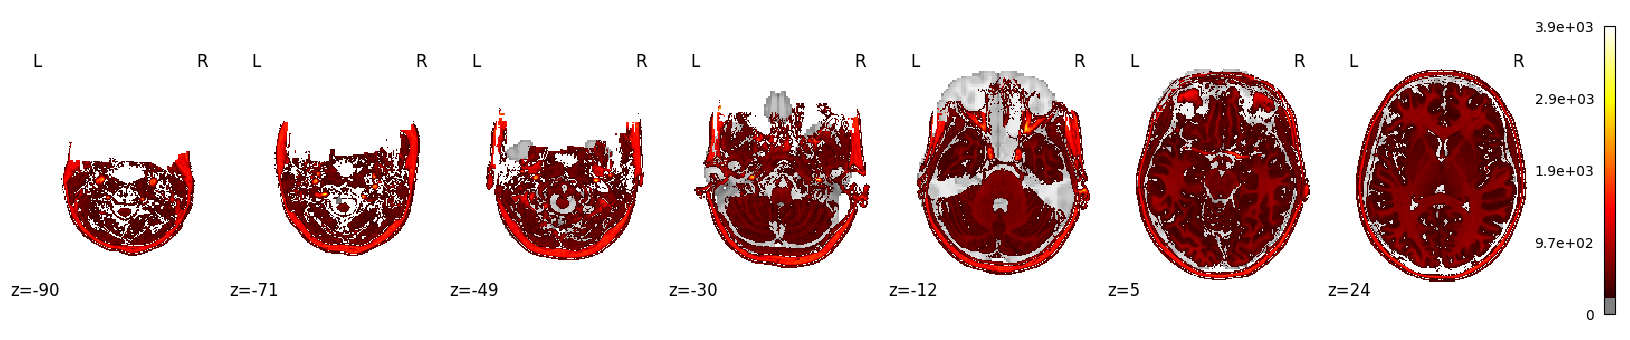

In [ ]:
plotting.plot_stat_map(filename, threshold=250, display_mode="z")

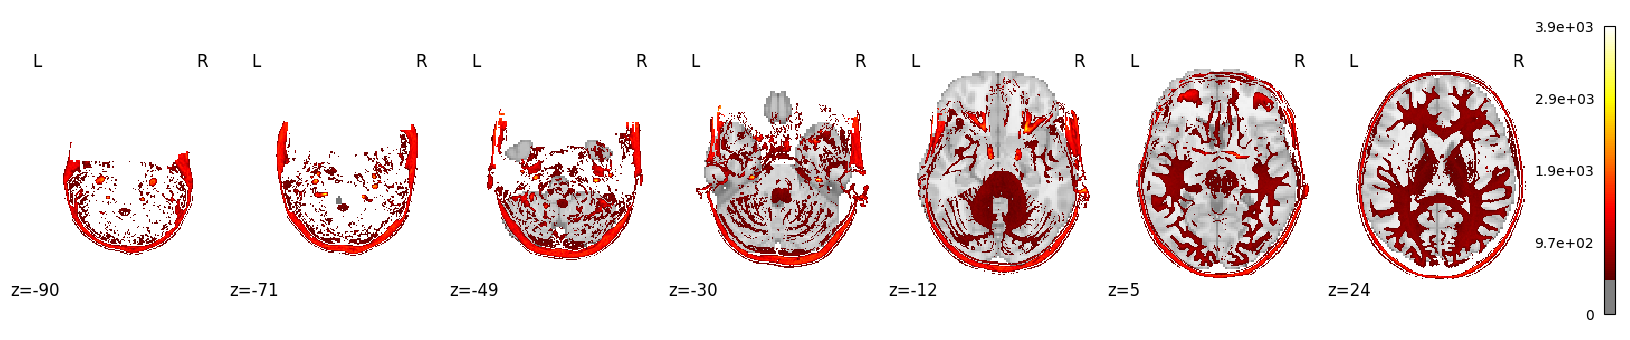

In [ ]:
plotting.plot_stat_map(filename, threshold=500, display_mode="z")

То же самое, но с дорисованным силуэтом мозга

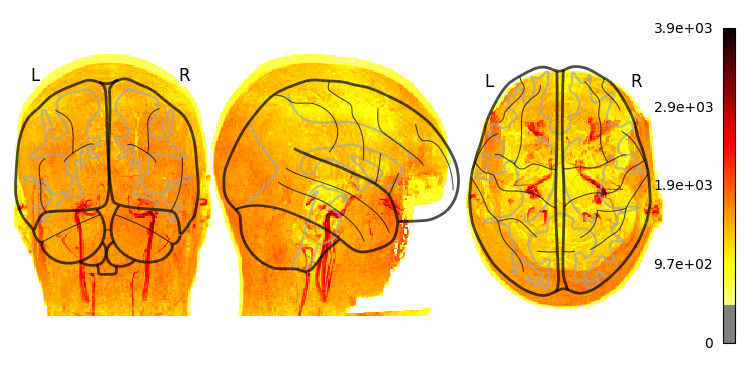

In [ ]:
plotting.plot_glass_brain(filename, threshold=500, colorbar=True)

Наиболее активные части:

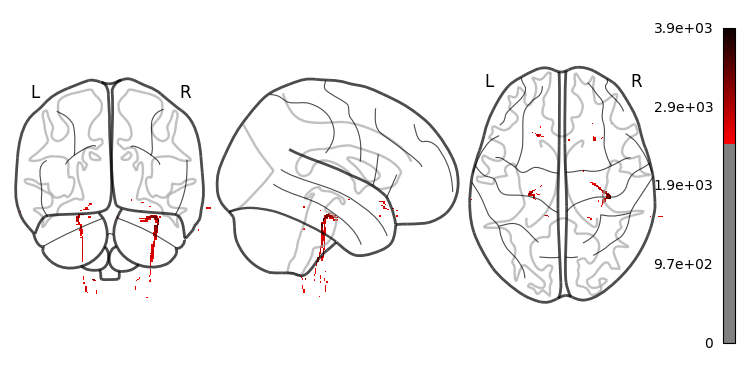

In [ ]:
plotting.plot_glass_brain(filename, threshold=2500, colorbar=True)

Всё ниже я не понял как интерпретировать

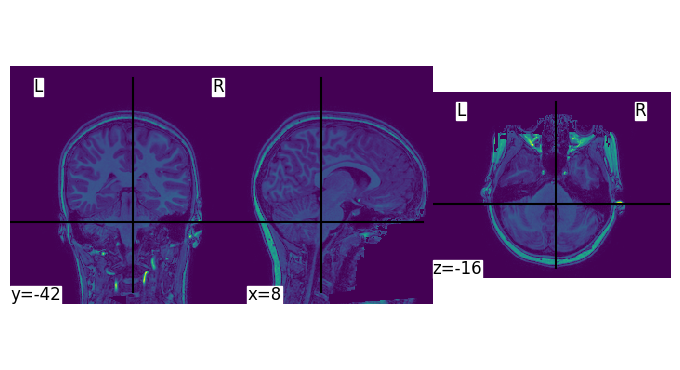

In [ ]:
plotting.plot_img(filename)

In [ ]:
smooth_anat_img = image.smooth_img(filename, fwhm=3)

In [ ]:
plotting.plot_img(smooth_anat_img[0])

TypeError: ignored

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:758: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)



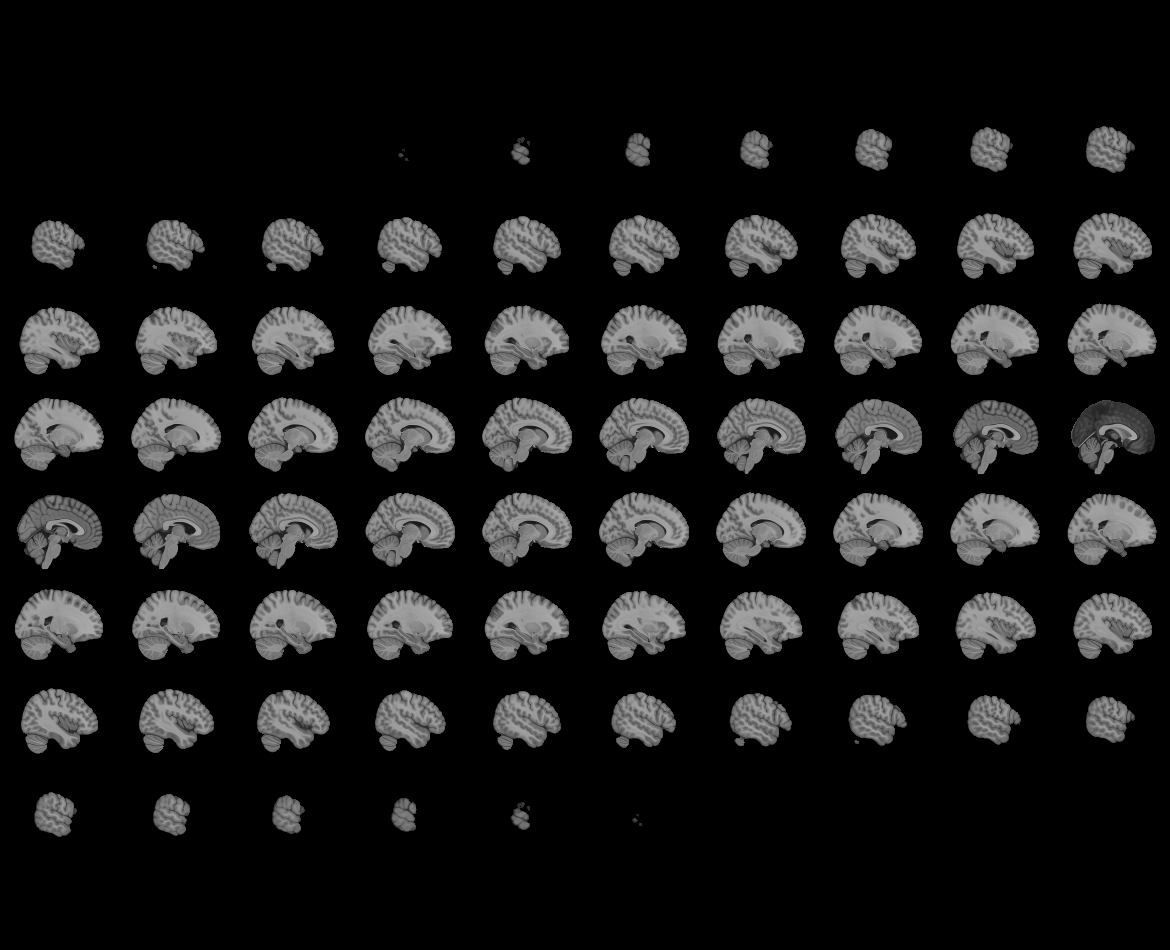
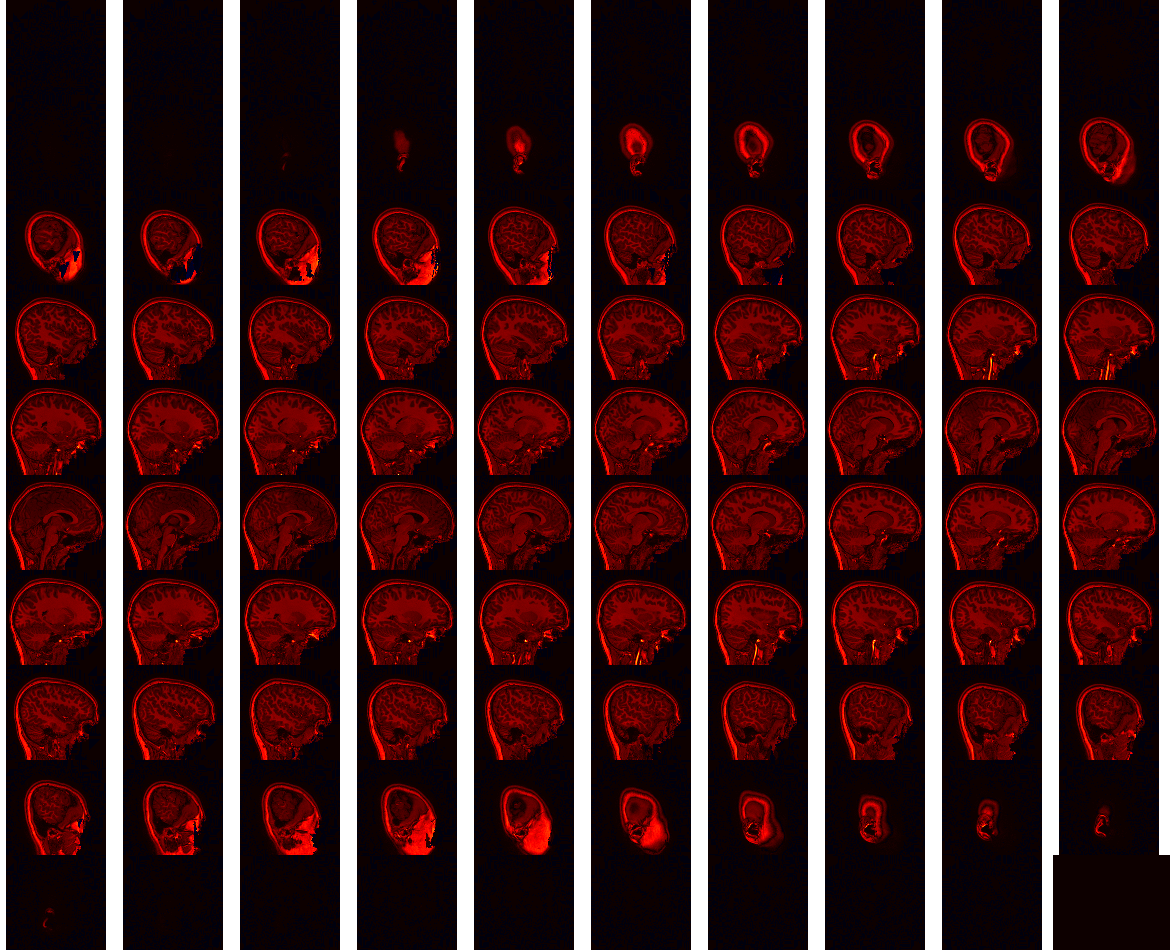

In [ ]:
plotting.view_img(image.mean_img(filename), threshold=None)

4D -> 2D

In [ ]:
from nilearn.masking import compute_epi_mask, apply_mask, unmask
from sklearn.preprocessing import StandardScaler

In [ ]:
mask_img = compute_epi_mask(filename4d)
masked_data = apply_mask(filename4d, mask_img)
scaler = StandardScaler()
masked_data = scaler.fit_transform(masked_data)
masked_data.shape

(152, 62623)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
class Encoder(nn.Module):
    def __init__(self):
        super(Encoder, self).__init__()
        self.linear = nn.Linear(62623, 512)
        self.lstm1 = nn.LSTM(512, 256)
        self.lstm2 = nn.LSTM(256, 100)
        self.linear_mu = nn.Linear(100, 100)
        self.linear_sigma = nn.Linear(100, 100)

        self.N = torch.distributions.Normal(0, 1)
        self.N.loc = self.N.loc.cuda() # hack to get sampling on the GPU
        self.N.scale = self.N.scale.cuda()
        self.kl = 0

    def forward(self, x):
        x = self.linear(x)
        x = self.lstm1(x)[0]
        x = self.lstm2(x)[0]
        mu = self.linear_mu(x)
        sigma = torch.exp(self.linear_sigma(x))
        z = mu + sigma*self.N.sample(mu.shape)
        self.kl = (sigma**2 + mu**2 - torch.log(sigma) - 1/2).mean()
        return z

In [ ]:
class Decoder(nn.Module):
    def __init__(self):
        super(Decoder, self).__init__()
        self.lstm1 = nn.LSTM(100, 256)
        self.lstm2 = nn.LSTM(256, 512)
        self.linear = nn.Linear(512, 62623)
    def forward(self, x):
        x = self.lstm1(x)[0]
        x = self.lstm2(x)[0]
        return self.linear(x)

In [ ]:
class VAE(nn.Module):
    def __init__(self):
        super(VAE, self).__init__()
        self.encoder = Encoder()
        self.decoder = Decoder()

    def forward(self, x):
        z = self.encoder(x)
        return self.decoder(z)

In [ ]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.linear1 = nn.Linear(62623, 512)
        self.lstm1 = nn.LSTM(512, 256)
        self.lstm2 = nn.LSTM(256, 100)
        self.linear2 = nn.Linear(100, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.linear1(x)
        x = self.lstm1(x)[0]
        x = self.lstm2(x)[0]
        x = self.linear2(x)
        x = self.sigmoid(x)
        return x

In [ ]:
dataloader = torch.utils.data.DataLoader(masked_data, batch_size=64, shuffle=True)

In [ ]:
device = torch.device("cuda:0" if (torch.cuda.is_available()) else "cpu")
device

device(type='cuda', index=0)

In [ ]:
vae = VAE().to(device)
discriminator = Discriminator().to(device)

In [ ]:
optimizer_vae = optim.Adam(vae.parameters(), lr=0.0002)
criterion_vae = nn.BCELoss()
optimizer_discrim = optim.SGD(discriminator.parameters(), lr=1e-3)
criterion_discrim = nn.BCELoss()

In [ ]:
real_label = 1.
fake_label = 0.
D_losses = []
VAE_losses = []
iters = 0
vae_epochs = 1000
n_epochs = 1000
discrim_epochs = 3
print_loss = 100 # print loss every print_loss epochs

def train_vae():
    for epoch in range(vae_epochs):
        for i, x in enumerate(dataloader, 0):
            x = x.to(device) # GPU
            optimizer_vae.zero_grad()
            x_hat = vae(x)
            loss = ((x - x_hat)**2).mean() + vae.encoder.kl
            loss.backward()
            optimizer_vae.step()
            VAE_losses.append(loss.item())
            if i == 2 and epoch % print_loss == 0:
                print('[Epoch %d/%d]\tLoss_VAE: %.4f, MSE: %.4f, D_KL: %.4f'
              % (epoch, n_epochs, loss.item(), ((x - x_hat)**2).mean().item(), vae.encoder.kl.item()))

def train():
    for epoch in range(n_epochs):
        for d_epoch in range(discrim_epochs):
            for i, data in enumerate(dataloader, 0):
                discriminator.zero_grad()
                real_cpu = data.to(device)
                b_size = real_cpu.size(0)
                label = torch.full((b_size,), real_label, dtype=torch.float, device=device)
               # print(real_cpu)
                output = discriminator(real_cpu).view(-1)
                errD_real = criterion_discrim(output, label)
                errD_real.backward()
                D_x = output.mean().item()
                noise = torch.randn(b_size, 100, device=device)
                fake = vae.decoder(noise)
                label.fill_(fake_label)
                output = discriminator(fake.detach()).view(-1)
                errD_fake = criterion_discrim(output, label)
                errD_fake.backward()
                D_G_z1 = output.mean().item()
                errD = errD_real + errD_fake
                optimizer_discrim.step()
                D_losses.append(errD.item())
                if i == 2 and epoch % print_loss == 0:
                    print('[Epoch %d/%d][%d/%d]\tLoss_D: %.4f\tMean prediction on true brains: %.4f\tMean prediction on generated brains: %.4f'
                  % (epoch, n_epochs, d_epoch + 1, discrim_epochs,
                     errD.item(), D_x, D_G_z1))
                    # Save Losses for plotting later
        for i, x in enumerate(dataloader, 0):
            x = x.to(device) # GPU
            optimizer_vae.zero_grad()
            x_hat = vae(x)
            loss = ((x - x_hat)**2).mean() + vae.encoder.kl
            loss.backward()
            optimizer_vae.step()
            VAE_losses.append(loss.item())
            if i == 2 and epoch % print_loss == 0:
                print('[Epoch %d/%d]\tLoss_VAE: %.4f, MSE: %.4f, D_KL: %.4f'
              % (epoch, n_epochs, loss.item(), ((x - x_hat)**2).mean().item(), vae.encoder.kl.item()))

In [ ]:
train_vae()

[Epoch 0/1000]	Loss_VAE: 1.3865, MSE: 0.8893, D_KL: 0.4971
[Epoch 100/1000]	Loss_VAE: 1.0587, MSE: 0.6749, D_KL: 0.3839
[Epoch 200/1000]	Loss_VAE: 0.9867, MSE: 0.5925, D_KL: 0.3943
[Epoch 300/1000]	Loss_VAE: 0.9288, MSE: 0.5206, D_KL: 0.4082
[Epoch 400/1000]	Loss_VAE: 0.9176, MSE: 0.4970, D_KL: 0.4206
[Epoch 500/1000]	Loss_VAE: 0.9253, MSE: 0.5044, D_KL: 0.4210
[Epoch 600/1000]	Loss_VAE: 0.8806, MSE: 0.4830, D_KL: 0.3977
[Epoch 700/1000]	Loss_VAE: 0.8483, MSE: 0.4462, D_KL: 0.4021
[Epoch 800/1000]	Loss_VAE: 0.8397, MSE: 0.4360, D_KL: 0.4037
[Epoch 900/1000]	Loss_VAE: 0.8217, MSE: 0.4159, D_KL: 0.4059


In [ ]:
train()

[Epoch 0/1000][1/3]	Loss_D: 1.3795	Mean prediction on true brains: 0.5096	Mean prediction on generated brains: 0.5061
[Epoch 0/1000][2/3]	Loss_D: 1.3816	Mean prediction on true brains: 0.5087	Mean prediction on generated brains: 0.5061
[Epoch 0/1000][3/3]	Loss_D: 1.3679	Mean prediction on true brains: 0.5087	Mean prediction on generated brains: 0.4993
[Epoch 0/1000]	Loss_VAE: 0.8387, MSE: 0.4366, D_KL: 0.4021
[Epoch 100/1000][1/3]	Loss_D: 0.6047	Mean prediction on true brains: 0.7502	Mean prediction on generated brains: 0.2556
[Epoch 100/1000][2/3]	Loss_D: 0.6346	Mean prediction on true brains: 0.7347	Mean prediction on generated brains: 0.2549
[Epoch 100/1000][3/3]	Loss_D: 0.8385	Mean prediction on true brains: 0.7033	Mean prediction on generated brains: 0.3295
[Epoch 100/1000]	Loss_VAE: 0.8035, MSE: 0.4022, D_KL: 0.4013
[Epoch 200/1000][1/3]	Loss_D: 0.2126	Mean prediction on true brains: 0.8984	Mean prediction on generated brains: 0.0890
[Epoch 200/1000][2/3]	Loss_D: 0.1788	Mean pred

In [ ]:
vae(torch.tensor(masked_data).to(device))

tensor([[ 0.1682,  0.4794, -0.6473,  ...,  0.6826,  0.3787, -1.1917],
        [-0.4557,  0.5386, -1.4241,  ...,  1.0111,  0.7843, -1.2378],
        [-0.4293,  0.4183, -1.0735,  ...,  0.9563,  0.7049, -1.1654],
        ...,
        [ 0.8604, -0.0314, -0.3441,  ..., -1.7020, -1.7506,  1.0242],
        [ 0.5476, -0.5318, -0.3270,  ..., -1.7373, -1.6518,  0.9526],
        [ 0.9079,  0.0453, -0.3478,  ..., -1.7052, -1.7688,  1.0350]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [ ]:
masked_data

array([[-0.36399233, -0.1279113 , -0.64083505, ...,  1.2637315 ,
         0.508265  , -1.0871423 ],
       [ 0.7251186 ,  1.9581957 , -2.1210382 , ...,  0.98672074,
         0.7848388 , -1.3664756 ],
       [-0.5818145 ,  0.53964293, -2.4552777 , ...,  1.3824505 ,
         0.7848388 , -0.8876185 ],
       ...,
       [ 1.3422813 ,  1.3740858 , -0.1633501 , ..., -1.5855223 ,
        -2.3496642 ,  0.7484768 ],
       [ 1.0518519 ,  0.2893101 , -0.35434407, ..., -1.6250952 ,
        -1.6582297 ,  1.5465722 ],
       [ 1.9957479 ,  0.53964293, -0.54533803, ..., -1.7042412 ,
        -1.7965165 ,  1.6662865 ]], dtype=float32)

In [ ]:
import seaborn as sns

<Axes: >

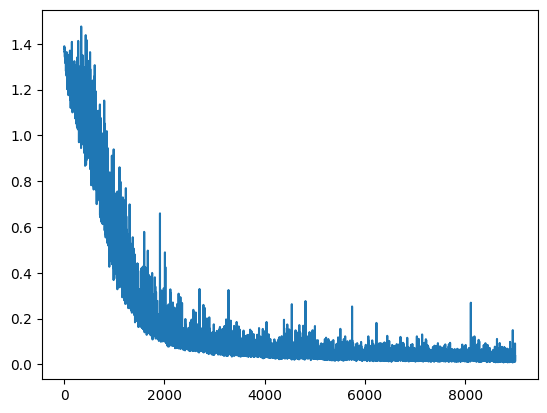

In [ ]:
sns.lineplot(D_losses)

<Axes: >

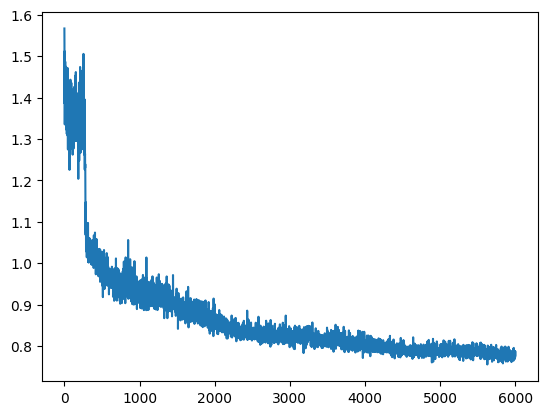

In [ ]:
sns.lineplot(VAE_losses)

In [ ]:
vae.load_state_dict(torch.load("vae"))
vae.eval()

VAE(
  (encoder): Encoder(
    (linear): Linear(in_features=62623, out_features=512, bias=True)
    (lstm1): LSTM(512, 256)
    (lstm2): LSTM(256, 100)
    (linear_mu): Linear(in_features=100, out_features=100, bias=True)
    (linear_sigma): Linear(in_features=100, out_features=100, bias=True)
  )
  (decoder): Decoder(
    (lstm1): LSTM(100, 256)
    (lstm2): LSTM(256, 512)
    (linear): Linear(in_features=512, out_features=62623, bias=True)
  )
)

In [ ]:
discriminator.load_state_dict(torch.load("discrim"))
discriminator.eval()

Discriminator(
  (linear1): Linear(in_features=62623, out_features=512, bias=True)
  (lstm1): LSTM(512, 256)
  (lstm2): LSTM(256, 100)
  (linear2): Linear(in_features=100, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [ ]:
import numpy as np

In [ ]:
# np.save("generated_brain", vae(torch.tensor(masked_data).to(device)).cpu().detach().numpy())

In [ ]:
filename4d = "sub-1019436_ses-1_task-rest_acq-1_run-1_bold.nii.gz"

In [ ]:
test_data = apply_mask(filename4d, mask_img)
scaler = StandardScaler()
test_data = scaler.fit_transform(test_data)
test_data.shape

(152, 62623)

In [ ]:
gen_npy = vae(torch.tensor(test_data).to(device)).cpu().detach().numpy()
gen_npy = scaler.inverse_transform(gen_npy)

In [ ]:
generated = unmask(gen_npy, mask_img)

In [ ]:
print(image.load_img(generated).shape)

(96, 96, 47, 152)


In [ ]:
print(image.load_img(filename4d).shape)

(96, 96, 47, 152)


In [ ]:
first_gen = image.index_img(generated, 0)
first_real = image.index_img(filename4d, 0)

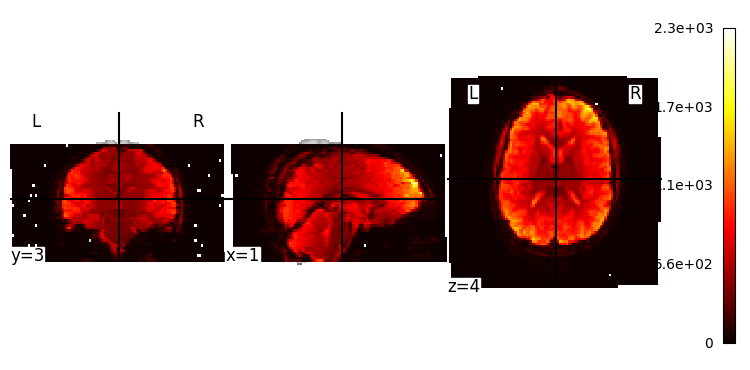

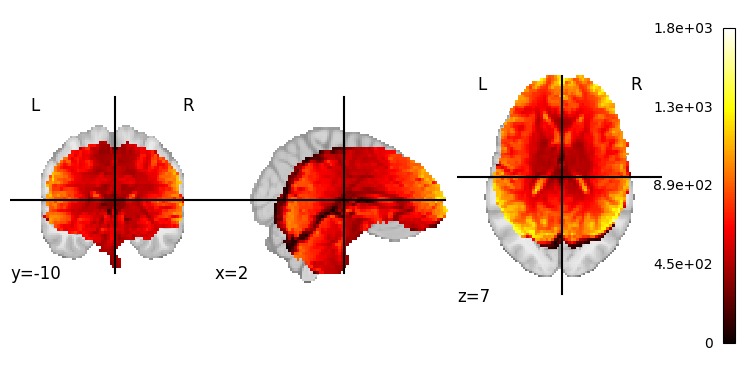

In [ ]:
plotting.plot_stat_map(first_real)
plotting.plot_stat_map(first_gen)

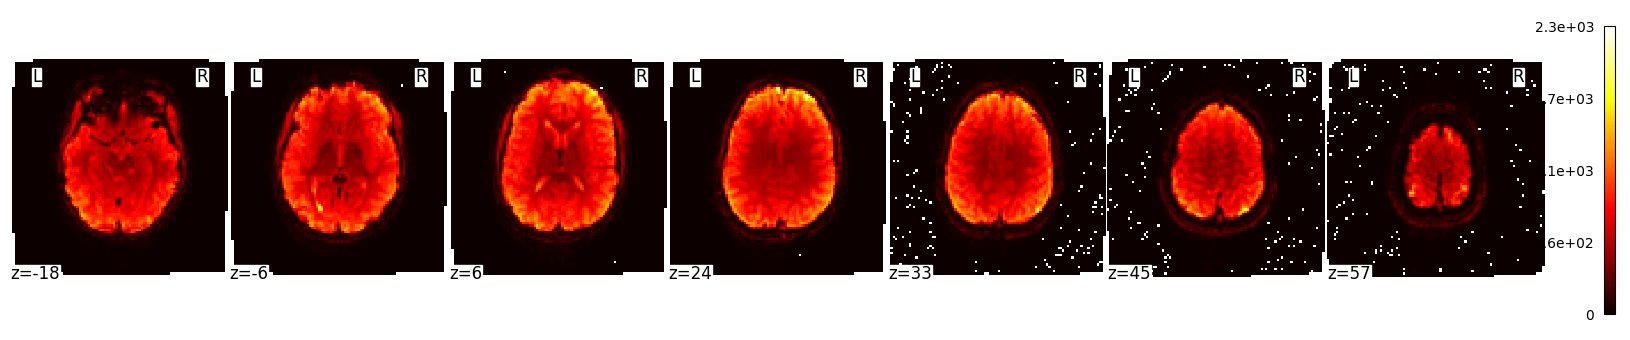

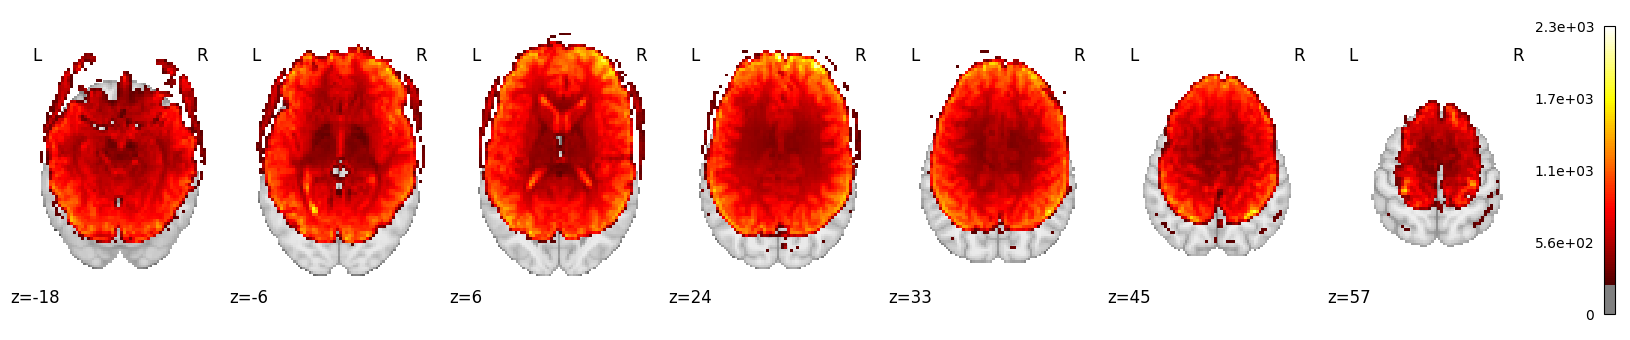

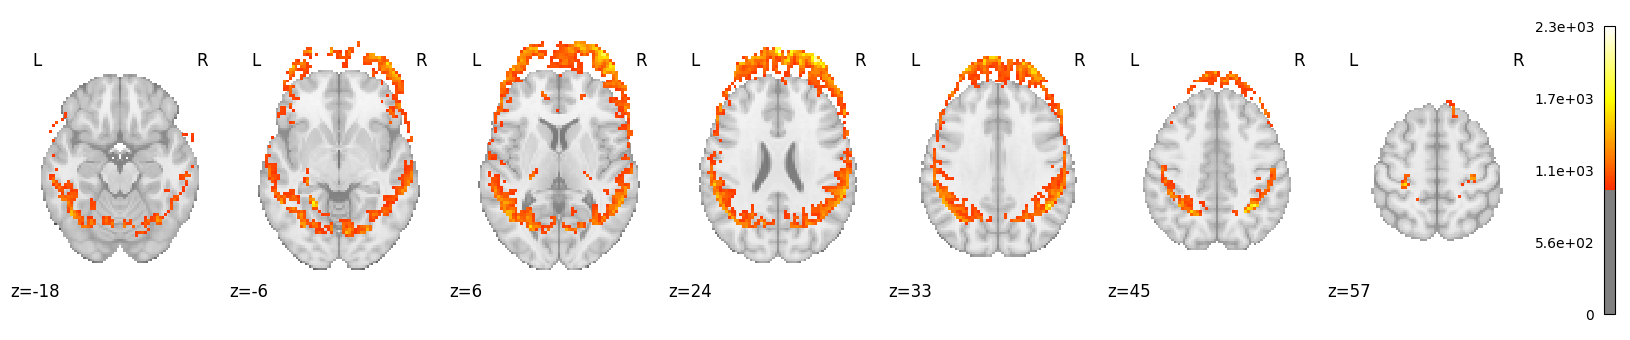

In [ ]:
plotting.plot_stat_map(first_real, threshold=0, display_mode="z")
plotting.plot_stat_map(first_real, threshold=250, display_mode="z")
plotting.plot_stat_map(first_real, threshold=1000, display_mode="z")

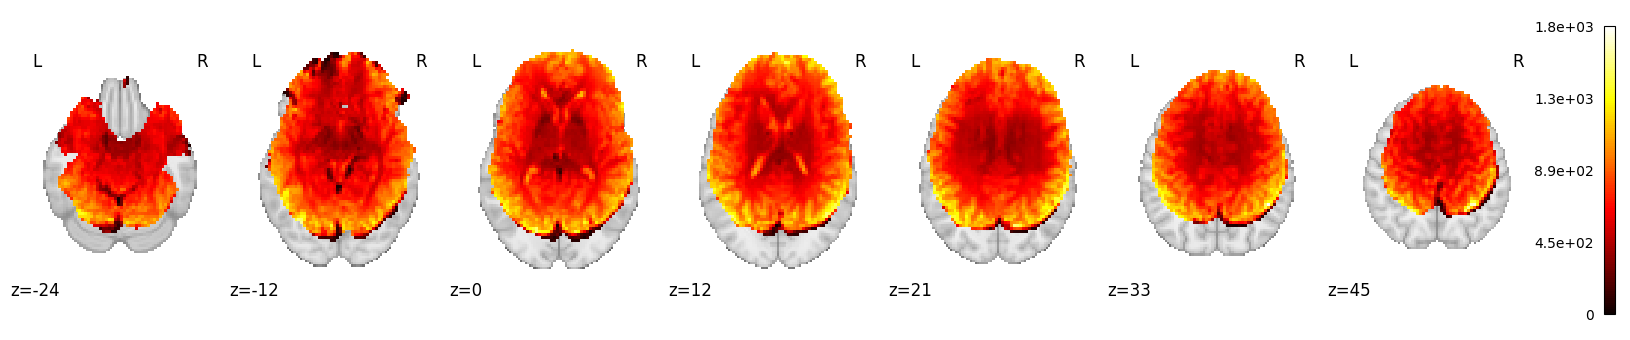

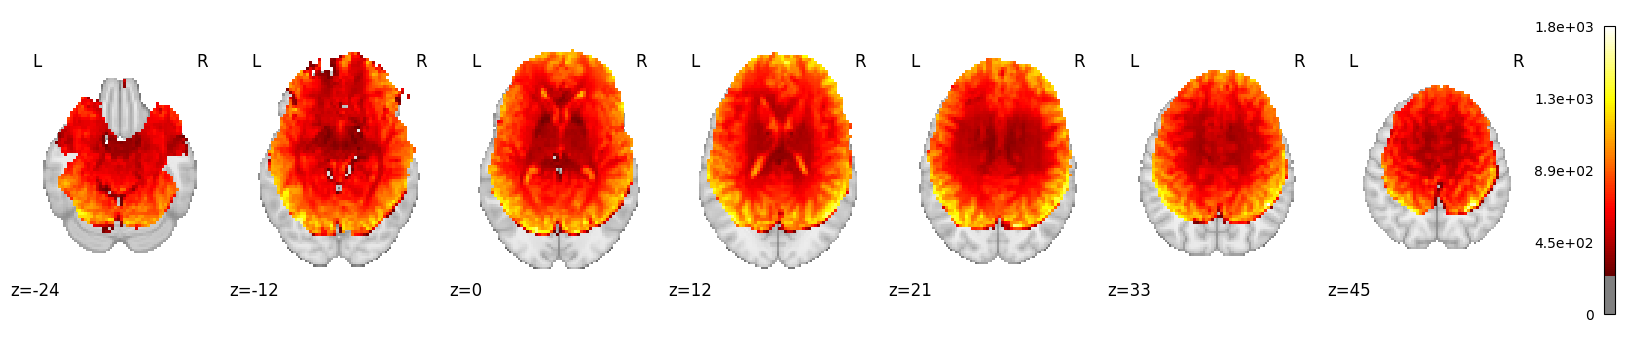

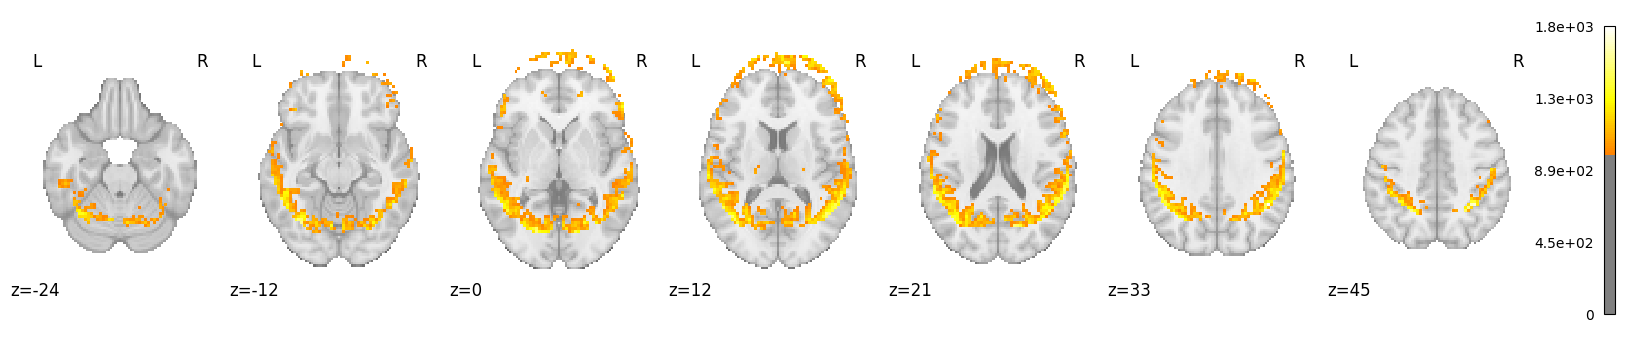

In [ ]:
plotting.plot_stat_map(first_gen, threshold=0, display_mode="z")
plotting.plot_stat_map(first_gen, threshold=250, display_mode="z")
plotting.plot_stat_map(first_gen, threshold=1000, display_mode="z")

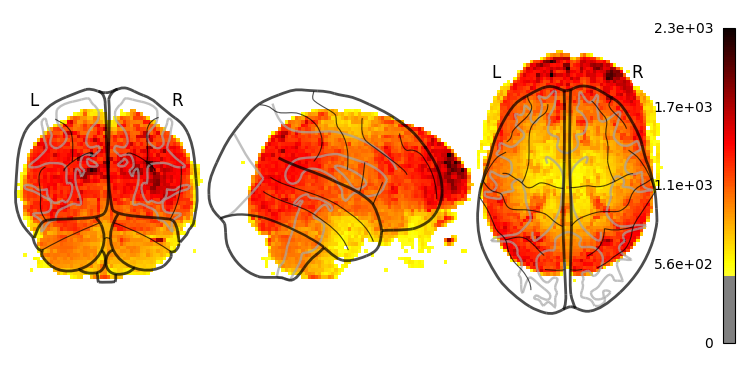

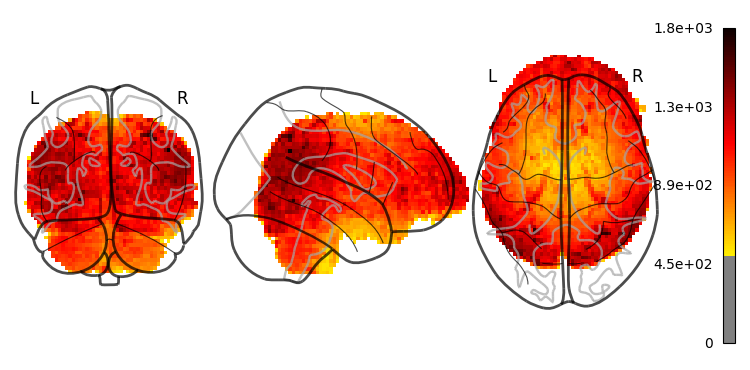

In [ ]:
plotting.plot_glass_brain(first_real, threshold=500, colorbar=True)
plotting.plot_glass_brain(first_gen, threshold=500, colorbar=True)

In [ ]:
first_gen == first_real

False

In [ ]:
scaler.inverse_transform(test_data)

array([[ 797.     , 1026.     ,  766.     , ...,  298.     ,  392.     ,
         416.     ],
       [ 788.     , 1020.     ,  773.     , ...,  358.00003,  434.     ,
         445.     ],
       [ 771.     , 1009.     ,  757.     , ...,  387.     ,  462.     ,
         461.     ],
       ...,
       [ 853.     ,  938.     ,  752.     , ...,  483.     ,  433.     ,
         551.     ],
       [ 852.     ,  927.     ,  761.     , ...,  520.     ,  440.     ,
         570.     ],
       [ 854.     ,  926.     ,  763.     , ...,  530.     ,  433.     ,
         568.     ]], dtype=float32)

In [ ]:
gen_npy

array([[821.6287 , 985.67566, 745.58813, ..., 566.45575, 532.01917,
        530.1143 ],
       [831.74585, 986.39777, 751.6707 , ..., 546.6177 , 517.3655 ,
        522.03326],
       [833.1389 , 983.4808 , 752.56946, ..., 544.2431 , 510.99734,
        516.1826 ],
       ...,
       [829.556  , 968.48804, 740.8323 , ..., 389.84647, 442.31683,
        680.2459 ],
       [812.9993 , 939.2646 , 740.5285 , ..., 390.17532, 457.46063,
        673.64526],
       [808.6026 , 939.67175, 739.8802 , ..., 397.25455, 465.83957,
        677.4229 ]], dtype=float32)

In [ ]:
((vae(torch.tensor(test_data).to(device)).cpu().detach().numpy() - test_data) ** 2).mean()

1.5436261